In [1]:
import sys
sys.path.append('../src/')
from utils import benchmark
from utils import iterate_bru_args
from utils import BenchmarkResult
from subprocess import TimeoutExpired

import matplotlib.pyplot as plt

In [2]:
max_x = 30

data = {}
xs = list(range(1, max_x))
for bru_args in iterate_bru_args():
    label = "-".join([e.value for e in bru_args.values()])
    ys = []
    try:
        for x in xs:
            y = BenchmarkResult(benchmark('^(a|a)*$', 'a' * x + 'b', bru_args)['stderr']).steps
            ys.append(y)
    except TimeoutExpired:
        pass
    data[label] = ys

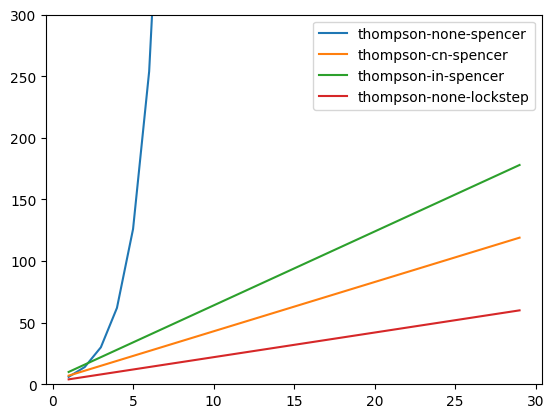

In [8]:
for label, ys in list(data.items())[:4]:
    plt.plot(xs[:len(ys)], ys)
plt.ylim(0, 300)
plt.legend(list(data.keys())[:4])
plt.show()

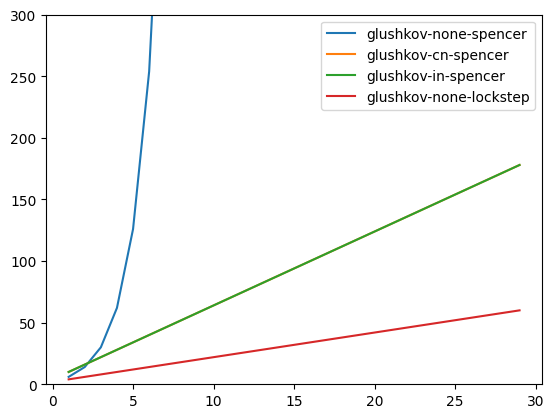

In [9]:
for label, ys in list(data.items())[4:]:
    plt.plot(xs[:len(ys)], ys)
plt.ylim(0, 300)
plt.legend(list(data.keys())[4:])
plt.show()